# collect all data and put them in a single dataframe

In [2]:
import os
import pandas as pd

results_path = "/home/boonstra/xin_results_24_3(2)"

data_frames = []
for filename in os.listdir(results_path):
    seed, extension = os.path.splitext(filename)
    if extension.lower() != ".csv":
        continue
    filepath = os.path.join(results_path, filename)
    df = pd.read_csv(filepath, header=0)
    df["seed"] = seed
    data_frames.append(df)

all_data = pd.concat(data_frames)
all_data.index = range(len(all_data))

In [3]:
import numpy as np
final_task_data = all_data[all_data["task"] == "C8"]



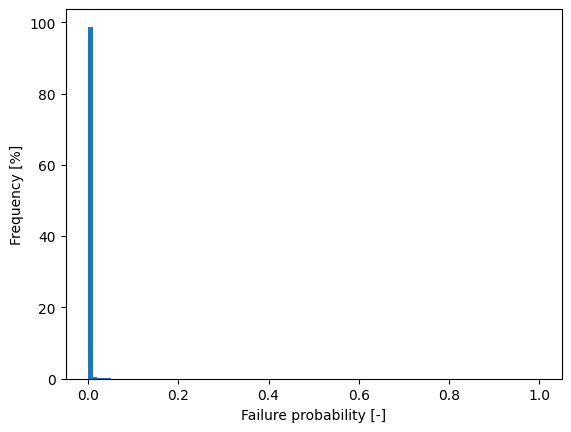

In [4]:
import matplotlib.pyplot as plt
import numpy as np

log_values = [np.log(value) for value in final_task_data["total"] if value != 0]
normal_values = [v for v in final_task_data["total"] if v > 1e-4]
plt.hist(normal_values, bins=100, density=True)
plt.xlabel("Failure probability [-]")
plt.ylabel("Frequency [%]") 

plt.show()

/tmp/ipykernel_35554/742122026.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_ticks)


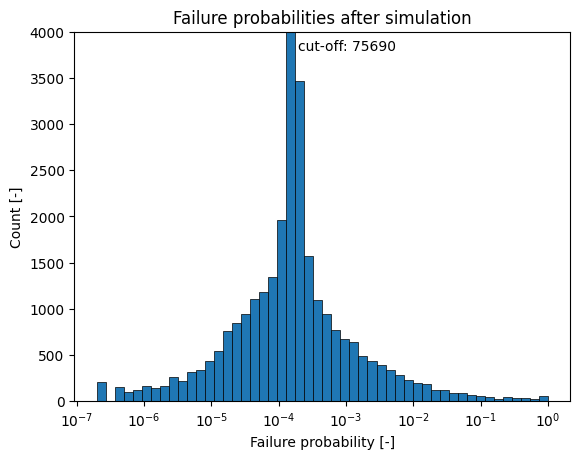

In [58]:
import matplotlib.pyplot as plt
import numpy as np

log_values = [np.log10(value) for value in final_task_data["total"] if value >= 2e-7]
# log_values = [value for value in log_values if value > np.log10(1.8e-4)]
n, bins, patches = plt.hist(log_values, bins=50, linewidth=0.5, edgecolor="black")
plt.title("Failure probabilities after simulation")
plt.xlabel("Failure probability [-]")
plt.ylabel("Count [-]")
plt.ylim(0,4e3)
x_ticks = ["$\mathregular{10^{%s}}$" %(item.get_text(),) for item in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(x_ticks)
plt.text(x=0.45, y= 0.95, s=f"cut-off: {int(max(n))}",transform=plt.gca().transAxes)
plt.show()

/tmp/ipykernel_35554/1195699642.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_ticks)


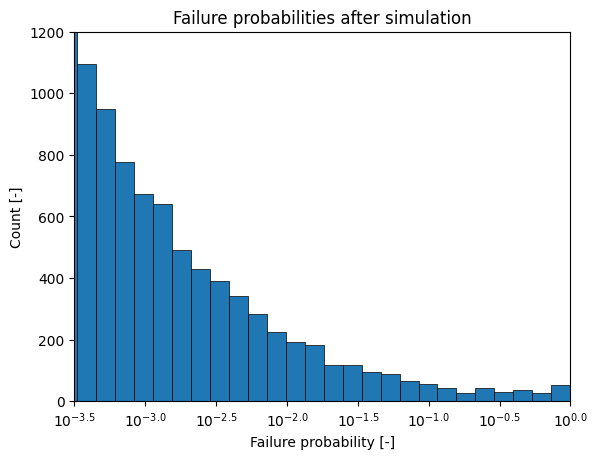

-502

In [56]:
import matplotlib.pyplot as plt
import numpy as np

log_values = [np.log10(value) for value in final_task_data["total"] if value > 2e-7]
# log_values = [value for value in log_values if value > np.log10(1.8e-4)]
n, bins, patches = plt.hist(log_values, bins=50, linewidth=0.5, edgecolor="black")
plt.title("Failure probabilities after simulation")
plt.xlabel("Failure probability [-]")
plt.ylabel("Count [-]")
plt.xlim(-3.5,0)
plt.ylim(0,1.2e3)
x_ticks = ["$\mathregular{10^{%s}}$" %(item.get_text(),) for item in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(x_ticks)
plt.show()
len(log_values) - len(final_task_data)

In [7]:
failure_data = scenario_data[scenario_data["total"] <= 0.0]
print(failure_data["scenario"].value_counts())

scenario
D1-S2     113
C3-S1      52
D23-S1     45
D27-S1     43
D15-S1     37
D51-S1     32
D14-S1     31
D57-S1     27
D14-S2     24
D33-S1     23
D15-S2     20
D33-S2     15
D23-S2     14
D27-S2     14
D42-S1     14
D16-S1     11
C4-S3       9
C4-S1       9
D16-S2      8
C4-S2       7
C7-S1       6
C4-S4       5
D20-S2      5
D20-S1      4
C8-S1       4
D3-S1       4
D17-S1      3
D10-S1      3
D10-S2      3
D18-S1      2
D13-S2      2
D12-S2      2
C1-S1       2
D17-S2      2
D21-S2      1
D7-S1       1
D13-S1      1
C6-S1       1
Name: count, dtype: int64


In [8]:
failure_data["error_magnitude"]

5716       1.735146
7764       0.744052
9668       2.023262
20041      0.626526
20898      2.473666
             ...   
2979135    1.583982
2980914    0.754991
2993245    1.282221
2996137    2.058061
2996150    1.202230
Name: error_magnitude, Length: 599, dtype: float64

In [9]:
failure_data[["seed", "scenario", "mutated_parameter", "error_magnitude"]]

,seed,scenario,mutated_parameter,error_magnitude
5716,68757,D27-S2,A_s,1.735146
7764,59428,C3-S1,L,0.744052
9668,42925,D15-S1,theta_R,2.023262
20041,55499,D1-S2,L,0.626526
20898,5110,D33-S2,theta_R,2.473666
...,...,...,...,...
2979135,92406,D23-S1,A_s,1.583982
2980914,92466,C3-S1,L,0.754991
2993245,8136,C4-S3,A_s,1.282221
2996137,77141,D14-S1,f_yd,2.058061


In [10]:
all_data["total"]

0          0.000153
1          0.000153
2          0.000153
3          0.000153
4          0.000153
             ...   
2999155    0.000153
2999156    0.000153
2999157    0.000153
2999158    0.000153
2999159    0.000153
Name: total, Length: 2999160, dtype: float64

In [11]:
final_task_data["hep"].describe()

count    99972.000000
mean         0.036216
std          0.021898
min          0.006001
25%          0.021288
50%          0.030642
75%          0.044839
max          0.374822
Name: hep, dtype: float64

In [12]:
all_data["human_error_occured"].sum()/len(all_data)

0.05363268381813575

In [13]:
0.56*0.28


0.15680000000000002